In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_polusi= pd.read_csv('global air pollution dataset.csv')
display(df_polusi)
df_polusi.shape

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


(23463, 12)

,CO AQI Value,Ozone AQI Value,CO AQI Category_Good,CO AQI Category_Moderate,CO AQI Category_Unhealthy for Sensitive Groups,Ozone AQI Category_Good,Ozone AQI Category_Moderate,Ozone AQI Category_Unhealthy,Ozone AQI Category_Unhealthy for Sensitive Groups,Ozone AQI Category_Very Unhealthy
0,1,36,1,0,0,1,0,0,0,0
1,1,5,1,0,0,1,0,0,0,0
2,1,39,1,0,0,1,0,0,0,0
3,1,34,1,0,0,1,0,0,0,0
4,0,22,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
23458,3,154,1,0,0,0,0,1,0,0
23459,1,20,1,0,0,1,0,0,0,0
23460,1,22,1,0,0,1,0,0,0,0
23461,1,44,1,0,0,1,0,0,0,0


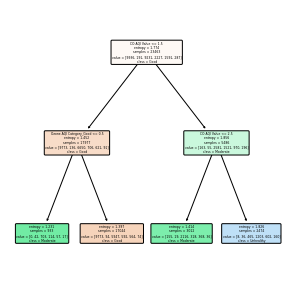

|--- CO AQI Value <= 1.50
|   |--- Ozone AQI Category_Good <= 0.50
|   |   |--- class: Moderate
|   |--- Ozone AQI Category_Good >  0.50
|   |   |--- class: Good
|--- CO AQI Value >  1.50
|   |--- CO AQI Value <= 2.50
|   |   |--- class: Moderate
|   |--- CO AQI Value >  2.50
|   |   |--- class: Unhealthy



In [53]:
fitur = ['CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category']

x = pd.get_dummies(df_polusi[fitur], prefix=['CO AQI Category', 'Ozone AQI Category'])
y = df_polusi['AQI Category']
display(x)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Membuat objek decision tree
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

# Train Model
clf_tree = clf_tree.fit(x.values, y)

# Decision Tree
plt.figure(figsize=(5,5))
tree.plot_tree(clf_tree, feature_names=x.columns, class_names=y.sort_values().unique(), filled=True, rounded=True)
plt.show()

# Ekstrak aturan dari decision tree
aturan = tree.export_text(clf_tree, feature_names=list(x.columns))
print(aturan)

In [52]:
pred_AQI = clf_tree.predict([[1,37,1,0,0,1,0,1,0,0]])
print('Prediksi kualitas udara: ', pred_AQI)

Prediksi kualitas udara:  ['Good']
